In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud

In [2]:
path_train = '/content/drive/MyDrive/Organizacion de datos/TP2 - Machine Learning/train.parq'
path_shodan = '/content/drive/MyDrive/Organizacion de datos/TP2 - Machine Learning/shodan_df_hashed.csv'

# Visualización 1

In [3]:
df_bar = pd.read_parquet(path_train)
df_bar = df_bar.loc[df_bar['label'] == 1, :]
df_bar['attack_time'] = df_bar['attack_time'].map(lambda x: x.hour)

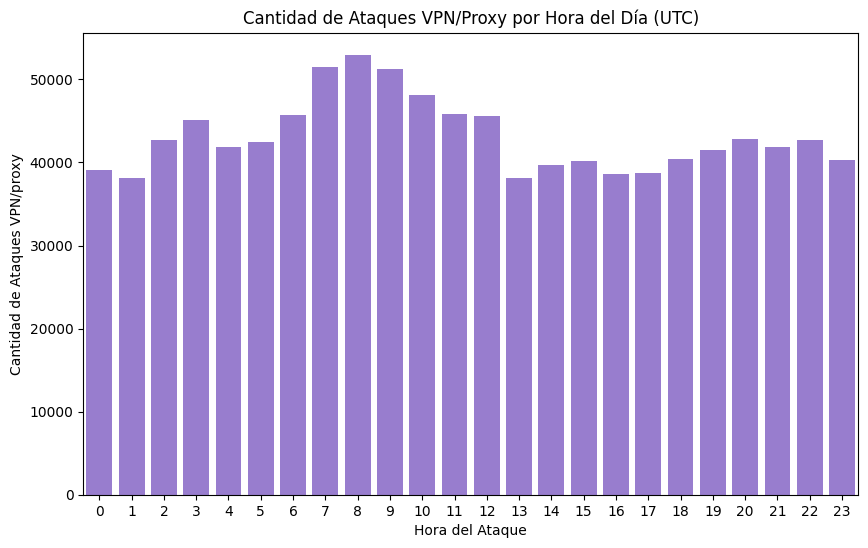

In [4]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_bar, x='attack_time', color='mediumpurple')
plt.xlabel('Hora del Ataque')
plt.ylabel('Cantidad de Ataques VPN/proxy')
plt.title('Cantidad de Ataques VPN/Proxy por Hora del Día (UTC)')
plt.show()

# Visualización 2


In [24]:
df_heatmap = pd.read_parquet(path_train)

df_heatmap = df_heatmap[df_heatmap['label'] == 1]
df_heatmap['attack_day'] = df_heatmap['attack_time'].map(lambda x: x.strftime("%A"))
df_heatmap['attack_time'] = df_heatmap['attack_time'].map(lambda x: x.hour)


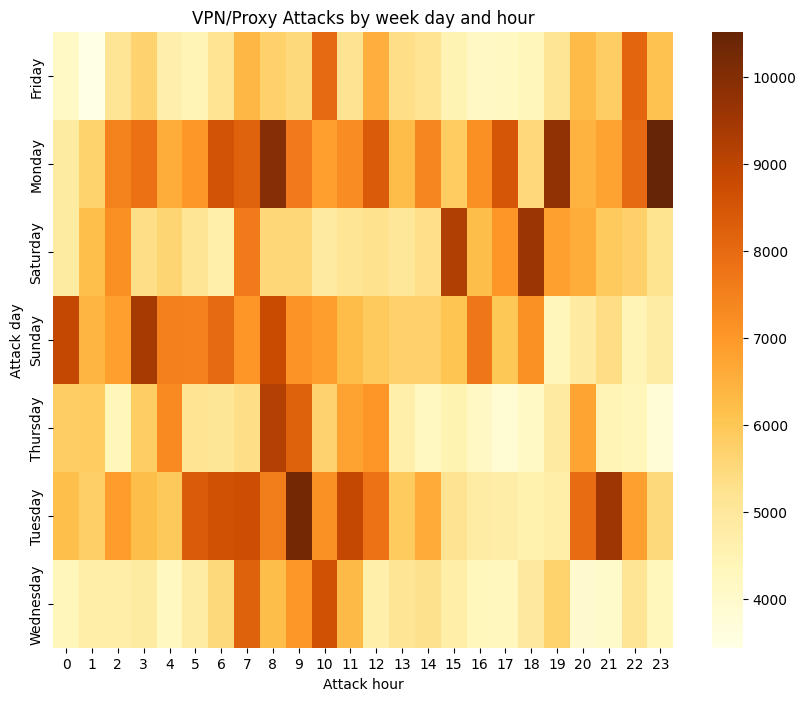

In [26]:
pivot_table = pd.pivot_table(df_heatmap, values='label', index='attack_day', columns='attack_time', aggfunc='count')

paleta_cmap = sns.color_palette("YlOrBr", as_cmap=True)
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, cmap=paleta_cmap, fmt='.0f')
plt.title('VPN/Proxy Attacks by week day and hour')
plt.xlabel('Attack hour')
plt.ylabel('Attack day')
plt.show()

# Visualización 3

In [27]:
df_dist = pd.read_parquet(path_train)
top_attackers_countries = df_heatmap['attacker_country'].value_counts().head(5).index.tolist()
df_dist = df_dist.loc[df_dist['label'] == 1, :]

filtered_df_top_countries = df_dist[df_dist['watcher_country'].isin(top_attackers_countries)]
filtered_df_top_countries = filtered_df_top_countries[filtered_df_top_countries['attacker_country'].isin(top_attackers_countries)]
filtered_df_top_countries['watcher_country'] = filtered_df_top_countries['watcher_country'].astype(str)
filtered_df_top_countries['attacker_country'] = filtered_df_top_countries['attacker_country'].astype(str)

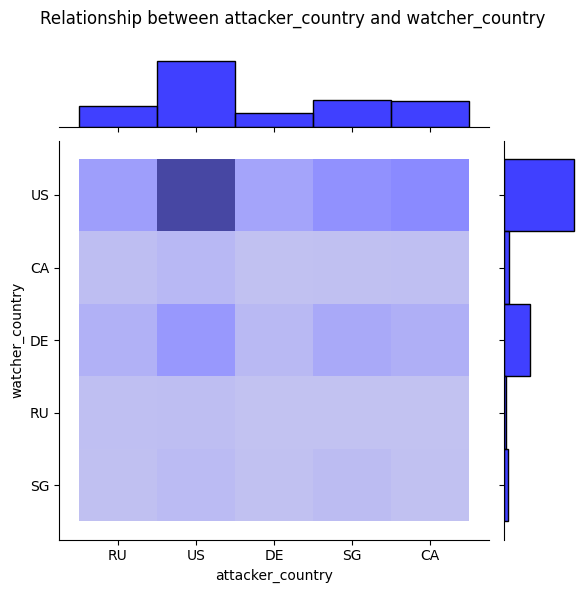

In [29]:
feature1 = 'attacker_country'
feature2 = 'watcher_country'

sns.jointplot(x=feature1, y=feature2, data=filtered_df_top_countries, kind='hist', label='VPN/Proxy', color='blue')

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.subplots_adjust(top=0.9)
plt.suptitle(f'Relationship between {feature1} and {feature2}')
plt.show()

# Visualización 4

In [ ]:
df_protocol = pd.read_parquet(path_train)
df_protocol = df_protocol.loc[df_protocol['label'] == 1, :]
df_protocol['attack_type'] = df_protocol['attack_type'].map(lambda x: x.split(":")[0])

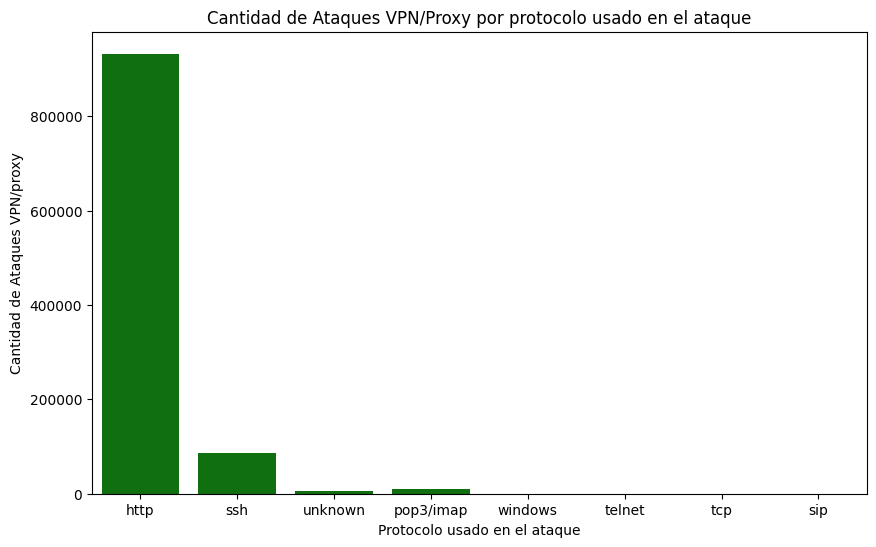

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_protocol, x='attack_type', color='green')
plt.xlabel('Protocolo usado en el ataque')
plt.ylabel('Cantidad de Ataques VPN/proxy')
plt.title('Cantidad de Ataques VPN/Proxy por protocolo usado en el ataque')
plt.show()

# Visualización 5

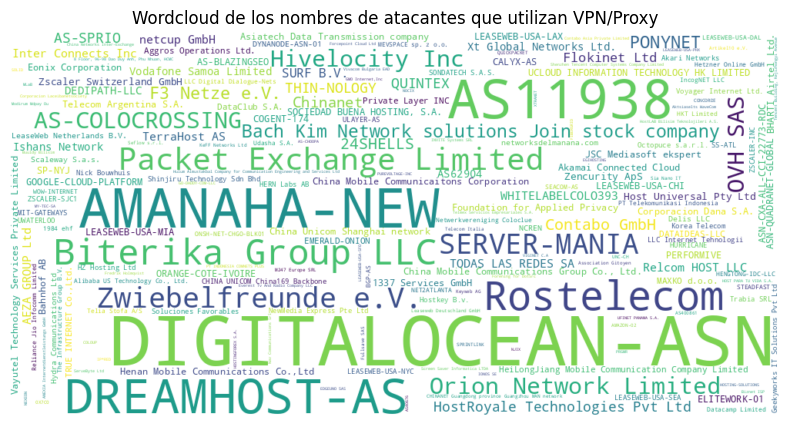

In [ ]:
df_wordcloud = pd.read_parquet(path_train)
df_wordcloud = df_wordcloud.loc[df_wordcloud['label'] == 1, :]

name_frequency = df_wordcloud['attacker_as_name'].value_counts().to_dict()

wordcloud = WordCloud(width=1000, height=500, background_color='white').generate_from_frequencies(name_frequency)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud de los nombres de atacantes que utilizan VPN/Proxy")

plt.show()

# Visualización 6




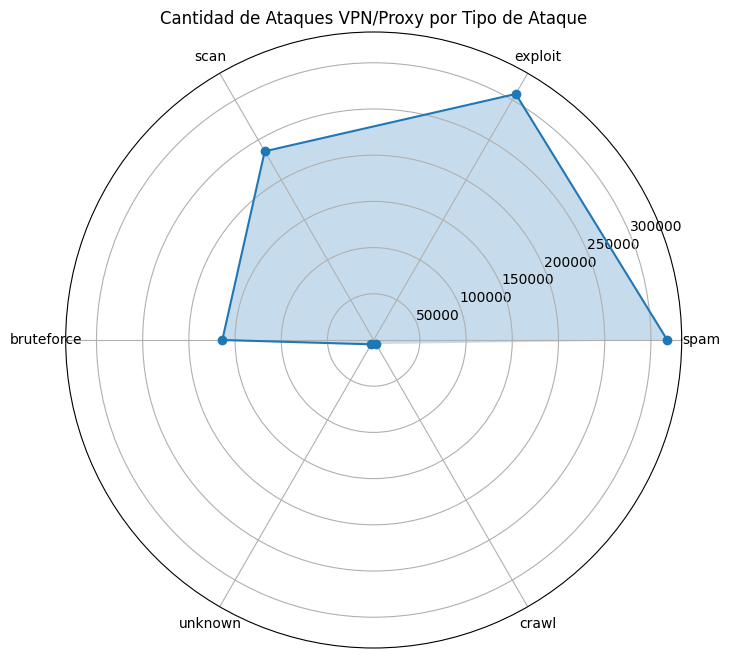

In [ ]:
df_radar = pd.read_parquet(path_train)
df_radar = df_radar.loc[df_radar['label'] == 1, :]
df_radar['attack_type'] = df_radar['attack_type'].str.split(":").str[1]

type_of_attacks_count = df_radar['attack_type'].value_counts()

attack_types = type_of_attacks_count.index
counts = type_of_attacks_count.values

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

angles = [n / float(len(attack_types)) * 2 * np.pi for n in range(len(attack_types))]


# Crear un radar chart
plt.polar(angles, counts, marker='o')
plt.fill(angles, counts, alpha=0.25)

# Personalizar el gráfico
plt.thetagrids([a * 180 / np.pi for a in angles], attack_types)
plt.title("Cantidad de Ataques VPN/Proxy por Tipo de Ataque")

# Mostrar el gráfico
plt.show()





